### Credit Fraud  Prediction

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
# Importing libraries
import pandas as pd 
import numpy as np
import requests
from bs4 import BeautifulSoup
import re
import requests
import json
import sys
from collections import Counter
import string
import urllib.request
from datetime import datetime
import plotly.graph_objs as go
from sklearn.ensemble import RandomForestClassifier
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split
from matplotlib import pyplot as plt
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib
%matplotlib inline
from pandas.plotting import scatter_matrix
from sklearn.preprocessing import LabelEncoder
from sklearn.feature_selection import RFE
from matplotlib import pyplot
from sklearn.metrics import accuracy_score
from sklearn import metrics 
from sklearn.utils import resample
from datetime import datetime
import warnings
warnings.filterwarnings("ignore")

#### Dataset Loading

Data in line-delimited JSON format, can be found here - https://github.com/CapitalOneRecruiting/DS 

In [3]:
# Importing dataset
df1 = pd.read_json('transactions.txt', lines=True)
df1.head(10)

,accountNumber,customerId,creditLimit,availableMoney,transactionDateTime,transactionAmount,merchantName,acqCountry,merchantCountryCode,posEntryMode,...,echoBuffer,currentBalance,merchantCity,merchantState,merchantZip,cardPresent,posOnPremises,recurringAuthInd,expirationDateKeyInMatch,isFraud
0,737265056,737265056,5000,5000.00,2016-08-13T14:27:32,98.55,Uber,US,US,02,...,,0.00,,,,False,,,False,False
1,737265056,737265056,5000,5000.00,2016-10-11T05:05:54,74.51,AMC #191138,US,US,09,...,,0.00,,,,True,,,False,False
2,737265056,737265056,5000,5000.00,2016-11-08T09:18:39,7.47,Play Store,US,US,09,...,,0.00,,,,False,,,False,False
3,737265056,737265056,5000,5000.00,2016-12-10T02:14:50,7.47,Play Store,US,US,09,...,,0.00,,,,False,,,False,False
4,830329091,830329091,5000,5000.00,2016-03-24T21:04:46,71.18,Tim Hortons #947751,US,US,02,...,,0.00,,,,True,,,False,False
5,830329091,830329091,5000,5000.00,2016-04-19T16:24:27,30.76,In-N-Out #422833,US,US,02,...,,0.00,,,,True,,,False,False
6,830329091,830329091,5000,5000.00,2016-05-21T14:50:35,57.28,Krispy Kreme #685312,US,US,02,...,,0.00,,,,True,,,False,False
7,830329091,830329091,5000,5000.00,2016-06-03T00:31:21,9.37,Shake Shack #968081,US,US,05,...,,0.00,,,,True,,,False,False
8,830329091,830329091,5000,4990.63,2016-06-10T01:21:46,523.67,Burger King #486122,,US,02,...,,9.37,,,,True,,,False,False
9,830329091,830329091,5000,5000.00,2016-07-11T10:47:16,164.37,Five Guys #510989,US,US,05,...,,0.00,,,,True,,,False,False


In [4]:
df1.columns

Index(['accountNumber', 'customerId', 'creditLimit', 'availableMoney',
       'transactionDateTime', 'transactionAmount', 'merchantName',
       'acqCountry', 'merchantCountryCode', 'posEntryMode', 'posConditionCode',
       'merchantCategoryCode', 'currentExpDate', 'accountOpenDate',
       'dateOfLastAddressChange', 'cardCVV', 'enteredCVV', 'cardLast4Digits',
       'transactionType', 'echoBuffer', 'currentBalance', 'merchantCity',
       'merchantState', 'merchantZip', 'cardPresent', 'posOnPremises',
       'recurringAuthInd', 'expirationDateKeyInMatch', 'isFraud'],
      dtype='object')

In [5]:
print("Number of records -", df1.shape[0])
print("Number of features -", df1.shape[1])

Number of records - 786363
Number of features - 29


In [6]:
df1.loc[:, ['creditLimit', 'availableMoney', 'transactionAmount', 'currentBalance']].describe()

,creditLimit,availableMoney,transactionAmount,currentBalance
count,786363.000000,786363.000000,786363.000000,786363.000000
mean,10759.464459,6250.725369,136.985791,4508.739089
std,11636.174890,8880.783989,147.725569,6457.442068
min,250.000000,-1005.630000,0.000000,0.000000
25%,5000.000000,1077.420000,33.650000,689.910000
50%,7500.000000,3184.860000,87.900000,2451.760000
75%,15000.000000,7500.000000,191.480000,5291.095000
max,50000.000000,50000.000000,2011.540000,47498.810000


In [7]:
# Count of null
print("acqCountry - ", len(df1[df1['acqCountry'] == ''])) 
print("merchantCountryCode - ", len(df1[df1['merchantCountryCode'] == ''])) 
print("posEntryMode - ", len(df1[df1['posEntryMode'] == ''])) 
print("posConditionCode - ", len(df1[df1['posConditionCode'] == ''])) 
print("transactionType - ", len(df1[df1['transactionType'] == ''])) 
print("echoBuffer - ", len(df1[df1['echoBuffer'] == ''])) 
print("merchantCity - ", len(df1[df1['merchantCity'] == ''])) 
print("merchantState - ", len(df1[df1['merchantState'] == ''])) 
print("merchantZip - ", len(df1[df1['merchantZip'] == ''])) 
print("posOnPremises - ", len(df1[df1['posOnPremises'] == ''])) 
print("recurringAuthInd - ", len(df1[df1['recurringAuthInd'] == ''])) 

acqCountry -  4562
merchantCountryCode -  724
posEntryMode -  4054
posConditionCode -  409
transactionType -  698
echoBuffer -  786363
merchantCity -  786363
merchantState -  786363
merchantZip -  786363
posOnPremises -  786363
recurringAuthInd -  786363


In [8]:
# Max values of numeric and date attributes
print("Max creditLimit - ", max(df1.creditLimit))
print("Max availableMoney - ", max(df1.availableMoney))
print("Max transactionDateTime - ", max(df1.transactionDateTime))
print("Max transactionAmount - ", max(df1.transactionAmount))
print("Max currentEDate - ", max(df1.currentExpDate))
print("Max accountOpenDate - ", max(df1.accountOpenDate))
print("Max dateOfLastAddressChange - ", max(df1.dateOfLastAddressChange))
print("Max currentBalance - ", max(df1.currentBalance))

Max creditLimit -  50000
Max availableMoney -  50000.0
Max transactionDateTime -  2016-12-30T23:59:45
Max transactionAmount -  2011.54
Max currentEDate -  12/2032
Max accountOpenDate -  2015-12-31
Max dateOfLastAddressChange -  2016-12-30
Max currentBalance -  47498.81


In [9]:
# Min values of numeric and date attributes
print("Min creditLimit - ", min(df1.creditLimit))
print("Min availableMoney - ", min(df1.availableMoney))
print("Min transactionDateTime - ", min(df1.transactionDateTime))
print("Min transactionAmount - ", min(df1.transactionAmount))
print("Min currentExpDate - ", min(df1.currentExpDate))
print("Min accountOpenDate - ", min(df1.accountOpenDate))
print("Min dateOfLastAddressChange - ", min(df1.dateOfLastAddressChange))
print("Min currentBalance - ", min(df1.currentBalance))

Min creditLimit -  250
Min availableMoney -  -1005.63
Min transactionDateTime -  2016-01-01T00:01:02
Min transactionAmount -  0.0
Min currentExpDate -  01/2020
Min accountOpenDate -  1989-08-22
Min dateOfLastAddressChange -  1989-08-22
Min currentBalance -  0.0


In [10]:
# Unique values of attributes
print("creditLimit - ", pd.unique(df1['creditLimit']))
print("\nacqCountry - ", pd.unique(df1['acqCountry']))
print("\nposEntryMode - ", pd.unique(df1['posEntryMode']))
print("\nposConditionCode - ", pd.unique(df1['posConditionCode']))
print("\nmerchantCategoryCode - ", pd.unique(df1['merchantCategoryCode']))
print("\ntransactionType - ", pd.unique(df1['transactionType']))
print("\ncardPresent - ", pd.unique(df1['cardPresent']))
print("\nexpirationDateKeyInMatch - ", pd.unique(df1['expirationDateKeyInMatch']))
print("\nisFraud - ", pd.unique(df1['isFraud']))

creditLimit -  [ 5000  2500 50000 15000 10000   250   500  1000  7500 20000]

acqCountry -  ['US' '' 'CAN' 'MEX' 'PR']

posEntryMode -  ['02' '09' '05' '80' '90' '']

posConditionCode -  ['01' '08' '99' '']

merchantCategoryCode -  ['rideshare' 'entertainment' 'mobileapps' 'fastfood' 'food_delivery'
 'auto' 'online_retail' 'gym' 'health' 'personal care' 'food' 'fuel'
 'online_subscriptions' 'online_gifts' 'hotels' 'airline' 'furniture'
 'subscriptions' 'cable/phone']

transactionType -  ['PURCHASE' 'ADDRESS_VERIFICATION' 'REVERSAL' '']

cardPresent -  [False  True]

expirationDateKeyInMatch -  [False  True]

isFraud -  [False  True]


#### Data Visualization

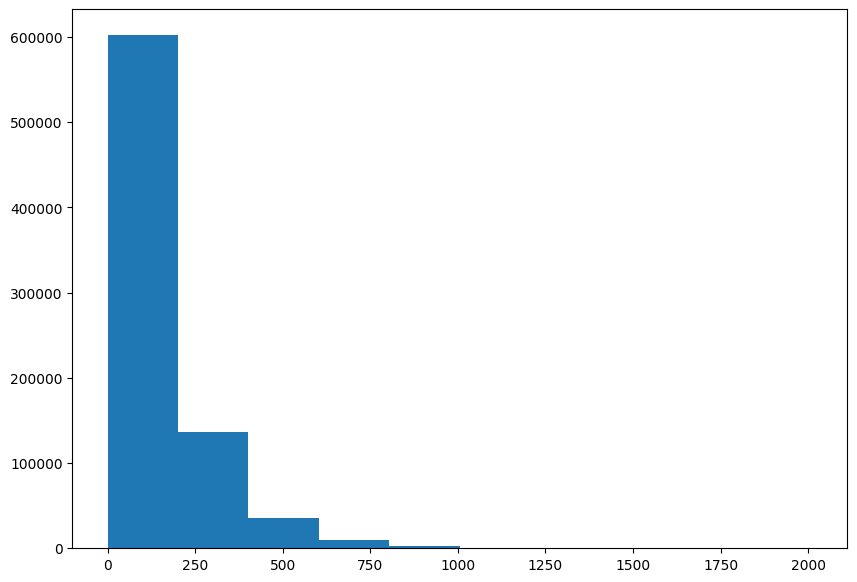

In [11]:
# Creating histogram of processed amounts of each transaction, the transactionAmount column
fig, ax = plt.subplots(figsize =(10, 7))
ax.hist(df1['transactionAmount'])
#ax.hist(df1['transactionAmount'], bins = list(range(200,2500,200)))
plt.show()

##### Data analysis

##### Transaction amount ranges from 0 to 2011.54, maximum values lie within the range 0 to 200 and there are very few transactions in the range 750 to 2011.54

##### The histogram plot for transactionAmount has a descending trend, meaning as the numeric range of values increases, the number of transactions within each range decreases. 

#### Data Wrangling - Duplicate Transactions

##### Duplicated transactions in the data set - 
##### Reversed transaction - a purchase is followed by a reversal
##### Multi-swipe transaction - a vendor accidentally charges a customer's card multiple times within a short time span

In [12]:
# reversed transaction
df1[df1['transactionType'] == "REVERSAL"]

,accountNumber,customerId,creditLimit,availableMoney,transactionDateTime,transactionAmount,merchantName,acqCountry,merchantCountryCode,posEntryMode,...,echoBuffer,currentBalance,merchantCity,merchantState,merchantZip,cardPresent,posOnPremises,recurringAuthInd,expirationDateKeyInMatch,isFraud
39,574788567,574788567,2500,2200.98,2016-05-24T01:38:03,215.13,Convenient Tire,US,US,09,...,,299.02,,,,True,,,False,False
73,574788567,574788567,2500,2432.72,2016-10-07T10:23:57,3.87,Eazy Repair,US,US,05,...,,67.28,,,,True,,,False,False
101,924729945,924729945,50000,49831.43,2016-10-19T14:01:45,168.57,discount.com,US,US,05,...,,168.57,,,,False,,,False,False
133,984504651,984504651,50000,46367.41,2016-01-16T09:53:15,450.74,Planet Fitness #849960,US,US,05,...,,3632.59,,,,False,,,False,False
156,984504651,984504651,50000,41909.30,2016-01-25T20:39:15,81.73,AMC #724446,US,US,09,...,,8090.70,,,,True,,,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
786106,899818521,899818521,2500,968.33,2016-09-29T02:04:32,10.05,cheapfast.com,US,US,02,...,,1531.67,,,,False,,,False,False
786120,638498773,638498773,10000,9798.21,2016-01-01T19:48:03,201.79,KFC #928167,US,US,05,...,,201.79,,,,True,,,False,False
786219,638498773,638498773,10000,5331.33,2016-11-03T04:23:26,86.14,Dunkin' Donuts #396342,US,US,05,...,,4668.67,,,,True,,,False,False
786225,638498773,638498773,10000,4393.10,2016-11-06T22:54:25,49.39,Shake Shack #118502,US,US,05,...,,5606.90,,,,True,,,False,False


In [13]:
# multi-swipe transactions 
# (using all columns but transaction date to identify multi-swipe transactions)
dup_col_list = ['accountNumber', 'customerId', 'creditLimit', 'availableMoney',
       'transactionAmount', 'merchantName', 'acqCountry', 'merchantCountryCode', 
       'posEntryMode', 'posConditionCode', 'merchantCategoryCode', 'currentExpDate',
       'accountOpenDate', 'dateOfLastAddressChange', 'cardCVV', 'enteredCVV', 
       'cardLast4Digits', 'transactionType', 'echoBuffer', 'currentBalance', 
       'merchantCity', 'merchantState', 'merchantZip', 'cardPresent', 'posOnPremises',
       'recurringAuthInd', 'expirationDateKeyInMatch', 'isFraud']

df1_ordered = df1.sort_values(by=['merchantName', 'customerId', 'transactionDateTime'])
dup_series = df1_ordered.duplicated(subset=dup_col_list, keep='first')
dup_series.unique()
df1_ordered[dup_series]

,accountNumber,customerId,creditLimit,availableMoney,transactionDateTime,transactionAmount,merchantName,acqCountry,merchantCountryCode,posEntryMode,...,echoBuffer,currentBalance,merchantCity,merchantState,merchantZip,cardPresent,posOnPremises,recurringAuthInd,expirationDateKeyInMatch,isFraud
494386,528210188,528210188,15000,13314.90,2016-09-14T15:15:29,63.23,1st BBQ,US,US,09,...,,1685.10,,,,True,,,False,False
702330,509335773,509335773,7500,1272.38,2016-11-30T19:44:01,0.00,1st Deli,US,US,02,...,,6227.62,,,,False,,,False,False
520846,669709817,669709817,15000,2340.18,2016-11-16T17:17:57,0.00,1st Deli,US,US,05,...,,12659.82,,,,False,,,False,False
34920,657326011,657326011,5000,2178.42,2016-09-08T07:05:55,0.00,1st Restaurant,US,US,05,...,,2821.58,,,,False,,,False,False
718858,474934734,474934734,2500,2149.60,2016-03-02T13:56:33,126.29,1st Sandwitch Bar #396252,US,US,05,...,,350.40,,,,True,,,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
428861,419709514,419709514,5000,1865.99,2016-05-21T10:43:21,0.00,walmart.com,US,US,90,...,,3134.01,,,,False,,,False,False
90212,575185599,575185599,5000,2570.19,2016-08-14T03:42:48,0.00,walmart.com,US,US,05,...,,2429.81,,,,False,,,False,False
484459,682319827,682319827,7500,4615.43,2016-06-17T08:59:41,0.00,walmart.com,US,US,05,...,,2884.57,,,,False,,,False,False
390047,776198499,776198499,7500,6988.66,2016-11-29T01:54:47,0.00,walmart.com,US,US,05,...,,511.34,,,,False,,,False,False


In [14]:
print("Total number of transactions for the reversed transaction - ", len(df1[df1['transactionType'] == "REVERSAL"])) 
print("Total dollar amount for the reversed transaction - ", sum(df1[df1['transactionType'] == "REVERSAL"]['transactionAmount']))

Total number of transactions for the reversed transaction -  20303
Total dollar amount for the reversed transaction -  2821792.4999999753


In [15]:
# (Considering first transaction to be "normal" and excluding it from the number of transactions and dollar amount counts)
print("Total number of transactions for the multi-swipe transaction - ", len(df1[dup_series])) 
print("Total dollar amount for the multi-swipe transaction - ", sum(df1[dup_series]['transactionAmount']))

Total number of transactions for the multi-swipe transaction -  4828
Total dollar amount for the multi-swipe transaction -  108389.24000000051


##### Findings

In [16]:
# Reversal transactions
rev_temp_df = df1[df1['transactionType'] == "REVERSAL"].copy()
rev_temp_df['trans_month_year'] = rev_temp_df.apply(lambda x: (pd.to_datetime(pd.Series(x['transactionDateTime']))).dt.strftime('%m/%Y'), axis=1)
rev_temp_df

print("number of reversal transactions - \n", rev_temp_df.groupby(['trans_month_year'])['customerId'].count())

print("\ntransactionAmount - \n", rev_temp_df.groupby(['trans_month_year'])['transactionAmount'].sum())
print("\ncurrentBalance - \n", rev_temp_df.groupby(['trans_month_year'])['currentBalance'].sum())
print("\ncreditLimit - \n", rev_temp_df.groupby(['trans_month_year'])['creditLimit'].sum())
print("\navailableMoney - \n", rev_temp_df.groupby(['trans_month_year'])['availableMoney'].sum())

number of reversal transactions - 
 trans_month_year
01/2016    1134
02/2016    1619
03/2016    1787
04/2016    1726
05/2016    1780
06/2016    1723
07/2016    1754
08/2016    1839
09/2016    1705
10/2016    1769
11/2016    1746
12/2016    1721
Name: customerId, dtype: int64

transactionAmount - 
 trans_month_year
01/2016    153216.60
02/2016    231212.09
03/2016    247492.19
04/2016    238915.40
05/2016    241549.41
06/2016    250525.20
07/2016    243008.63
08/2016    261747.11
09/2016    230598.37
10/2016    246213.38
11/2016    241252.44
12/2016    236061.68
Name: transactionAmount, dtype: float64

currentBalance - 
 trans_month_year
01/2016    4400494.80
02/2016    6542903.30
03/2016    8359729.13
04/2016    8168582.05
05/2016    8438950.57
06/2016    8407688.79
07/2016    8655878.01
08/2016    9240166.42
09/2016    8719249.71
10/2016    9123442.94
11/2016    8618795.64
12/2016    9257211.79
Name: currentBalance, dtype: float64

creditLimit - 
 trans_month_year
01/2016    12730000


##### The number of reversal transactions has increased significantly from February 2016 onwards i.e. difference between number of reversal transactions in Jan and Feb is high compared to Feb and any other month. This is also true for total transactionAmount, currentBalance, creditLimit, availableMoney.

In [17]:
reversed_interesting_df1 = rev_temp_df.groupby(['trans_month_year', 'merchantCategoryCode'], as_index=False)['customerId'].count()
reversed_interesting_df1

reversed_interesting_df1.groupby(['merchantCategoryCode'], as_index=False)['customerId'].sum().sort_values("customerId", ascending=False) 

,merchantCategoryCode,customerId
9,online_retail,5619
3,fastfood,3161
2,entertainment,2242
4,food,2138
8,online_gifts,1846
11,rideshare,1381
7,hotels,1006
12,subscriptions,618
1,auto,591
6,health,535


##### The majority of the reversal transactions are from merchantCategory online_retail with the top 5 merchantCategories being online_retail, fastfood, entertainment, food, online_gifts.

In [18]:
reversed_interesting_df2 = rev_temp_df.groupby(['trans_month_year', 'merchantCountryCode'], as_index=False)['customerId'].count()
reversed_interesting_df2

reversed_interesting_df2.groupby(['merchantCountryCode'], as_index=False)['customerId'].sum().sort_values("customerId", ascending=False) 

,merchantCountryCode,customerId
4,US,20083
2,MEX,84
1,CAN,75
3,PR,41
0,,20


##### The majority of the reversal transactions are from merchantCountry 'US'.

In [19]:
# Multiswipe transactions
multiswipe_temp_df = df1_ordered[dup_series]
multiswipe_temp_df['trans_month_year'] = multiswipe_temp_df.apply(lambda x: (pd.to_datetime(pd.Series(x['transactionDateTime']))).dt.strftime('%m/%Y'), axis=1)
multiswipe_temp_df

print("number of multiswipe transactions - \n", multiswipe_temp_df.groupby(['trans_month_year'])['customerId'].count())

print("\ntransactionAmount - \n", multiswipe_temp_df.groupby(['trans_month_year'])['transactionAmount'].sum())
print("\ncreditLimit - \n", multiswipe_temp_df.groupby(['trans_month_year'])['creditLimit'].sum())
print("\navailableMoney - \n", multiswipe_temp_df.groupby(['trans_month_year'])['availableMoney'].sum())

number of multiswipe transactions - 
 trans_month_year
01/2016     21
02/2016     82
03/2016    163
04/2016    225
05/2016    281
06/2016    364
07/2016    413
08/2016    510
09/2016    574
10/2016    650
11/2016    730
12/2016    815
Name: customerId, dtype: int64

transactionAmount - 
 trans_month_year
01/2016      694.60
02/2016     1400.15
03/2016     3619.90
04/2016     4090.43
05/2016     6416.14
06/2016     7063.62
07/2016     8219.09
08/2016    10399.62
09/2016    13070.27
10/2016    15343.11
11/2016    18154.57
12/2016    19917.74
Name: transactionAmount, dtype: float64

creditLimit - 
 trans_month_year
01/2016     202000
02/2016     732500
03/2016    1573500
04/2016    2051500
05/2016    2609500
06/2016    3603750
07/2016    4283500
08/2016    4722750
09/2016    5502250
10/2016    6221500
11/2016    7197250
12/2016    7911750
Name: creditLimit, dtype: int64

availableMoney - 
 trans_month_year
01/2016     110588.62
02/2016     675930.07
03/2016    1488038.71
04/2016    200405

##### The number of multiswipe transactions increases each month by a significant number. This is also true for total transactionAmount, creditLimit, availableMoney.

In [20]:
multiswipe_interesting_df1 = multiswipe_temp_df.groupby(['trans_month_year', 'merchantCategoryCode'], as_index=False)['customerId'].count()
multiswipe_interesting_df1

multiswipe_interesting_df1.groupby(['merchantCategoryCode'], as_index=False)['customerId'].sum().sort_values("customerId", ascending=False) 

,merchantCategoryCode,customerId
12,mobileapps,1754
15,online_subscriptions,1191
7,fuel,781
6,food_delivery,606
9,gym,189
14,online_retail,65
2,cable/phone,50
4,fastfood,39
3,entertainment,32
5,food,28


##### The majority of the multi swipe transactions are from merchantCategory mobileapps with the top 5 merchantCategories being mobileapps, online_subscriptions, fuel, food_delivery, gym.

In [21]:
multiswipe_interesting_df1 = multiswipe_temp_df.groupby(['trans_month_year', 'merchantCountryCode'], as_index=False)['customerId'].count()
multiswipe_interesting_df1

multiswipe_interesting_df1.groupby(['merchantCountryCode'], as_index=False)['customerId'].sum().sort_values("customerId", ascending=False) 

,merchantCountryCode,customerId
4,US,4763
2,MEX,31
1,CAN,20
3,PR,13
0,,1


##### The majority of the multi swipe transactions are from merchantCountry 'US'.

#### Modelling

Building a predictive model to determine whether a given transaction will be fraudulent or not.

In [22]:
# Exploration
df1.groupby('isFraud').mean()

,accountNumber,customerId,creditLimit,availableMoney,transactionAmount,cardCVV,enteredCVV,cardLast4Digits,currentBalance,cardPresent,expirationDateKeyInMatch
isFraud,,,,,,,,,,,
False,5.373624e+08,5.373624e+08,10754.884062,6252.455386,135.570249,544.180723,543.897110,4757.081613,4502.428675,0.451469,0.001331
True,5.291445e+08,5.291445e+08,11044.958525,6142.894186,225.215905,562.331884,562.056616,4778.372151,4902.064338,0.278248,0.001047


##### Mean of transactionAmount for fraudulent transactions is higher than mean of transactionAmount for non fraudulent transactions

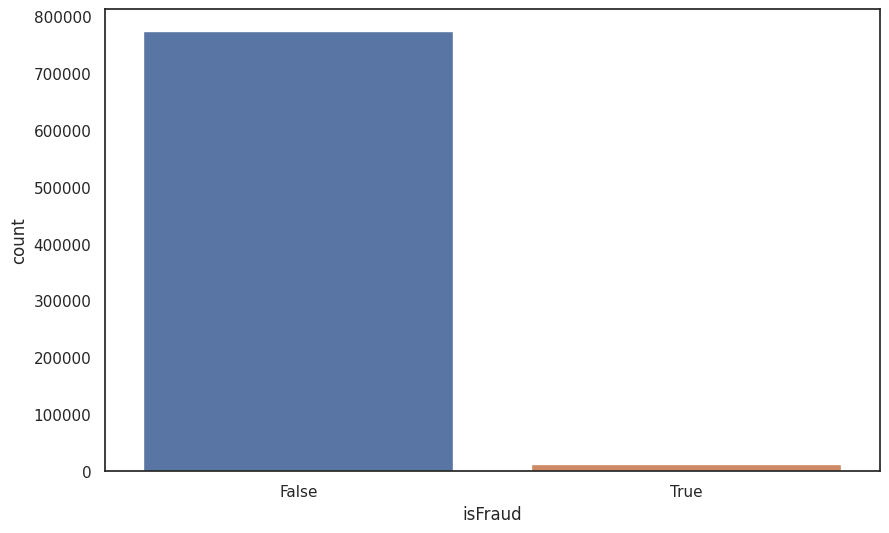

In [23]:
# Class imbalance
matplotlib.rcParams['figure.figsize'] = (10, 6)
sns.set(style="white")
sns.countplot(x='isFraud', data=df1)
plt.show()

In [24]:
print("Number of Transactions which are Fraud =", len(df1[df1['isFraud']==True]))
print("Number of Transactions which are Not Fraud =", len(df1[df1['isFraud']==False]))

Number of Transactions which are Fraud = 12417
Number of Transactions which are Not Fraud = 773946


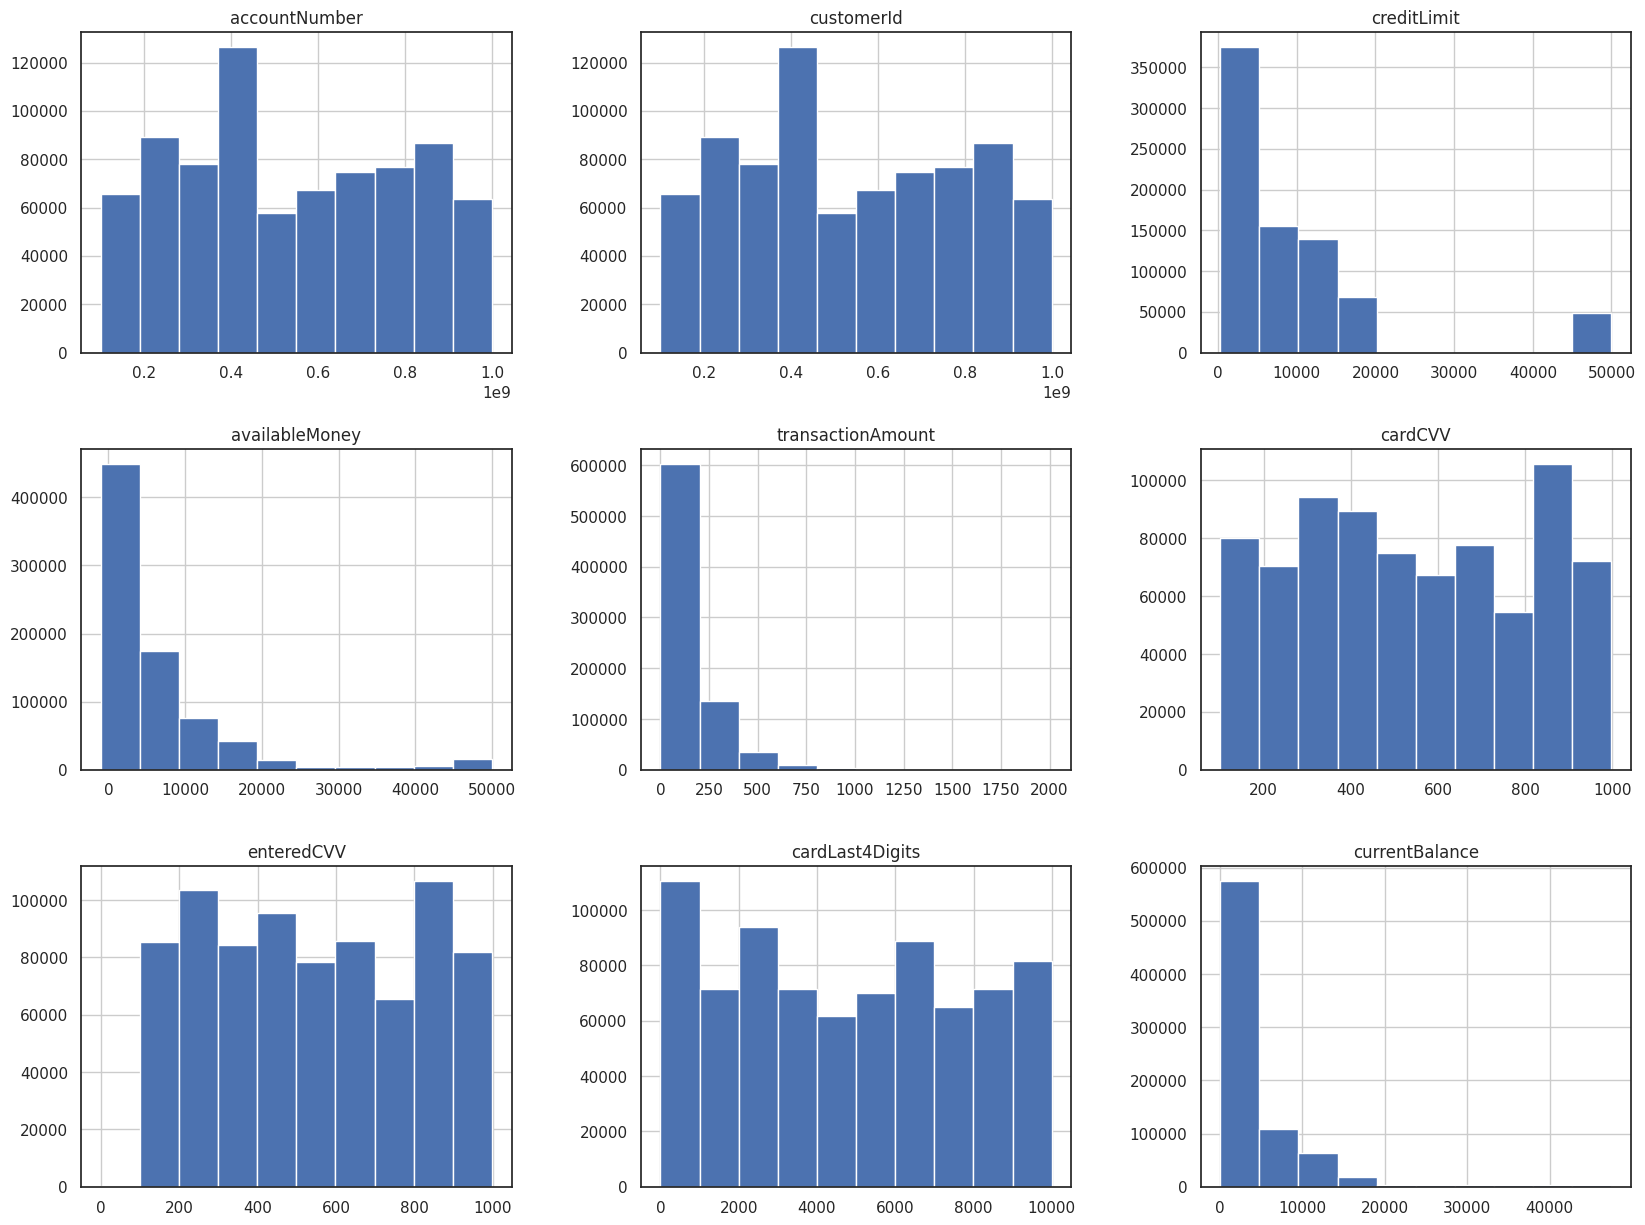

In [25]:
# Histogram of numeric variables
df1.hist(bins=10, figsize=(20,15))
plt.savefig("attribute_histogram_plots")
plt.show()

<Axes: >

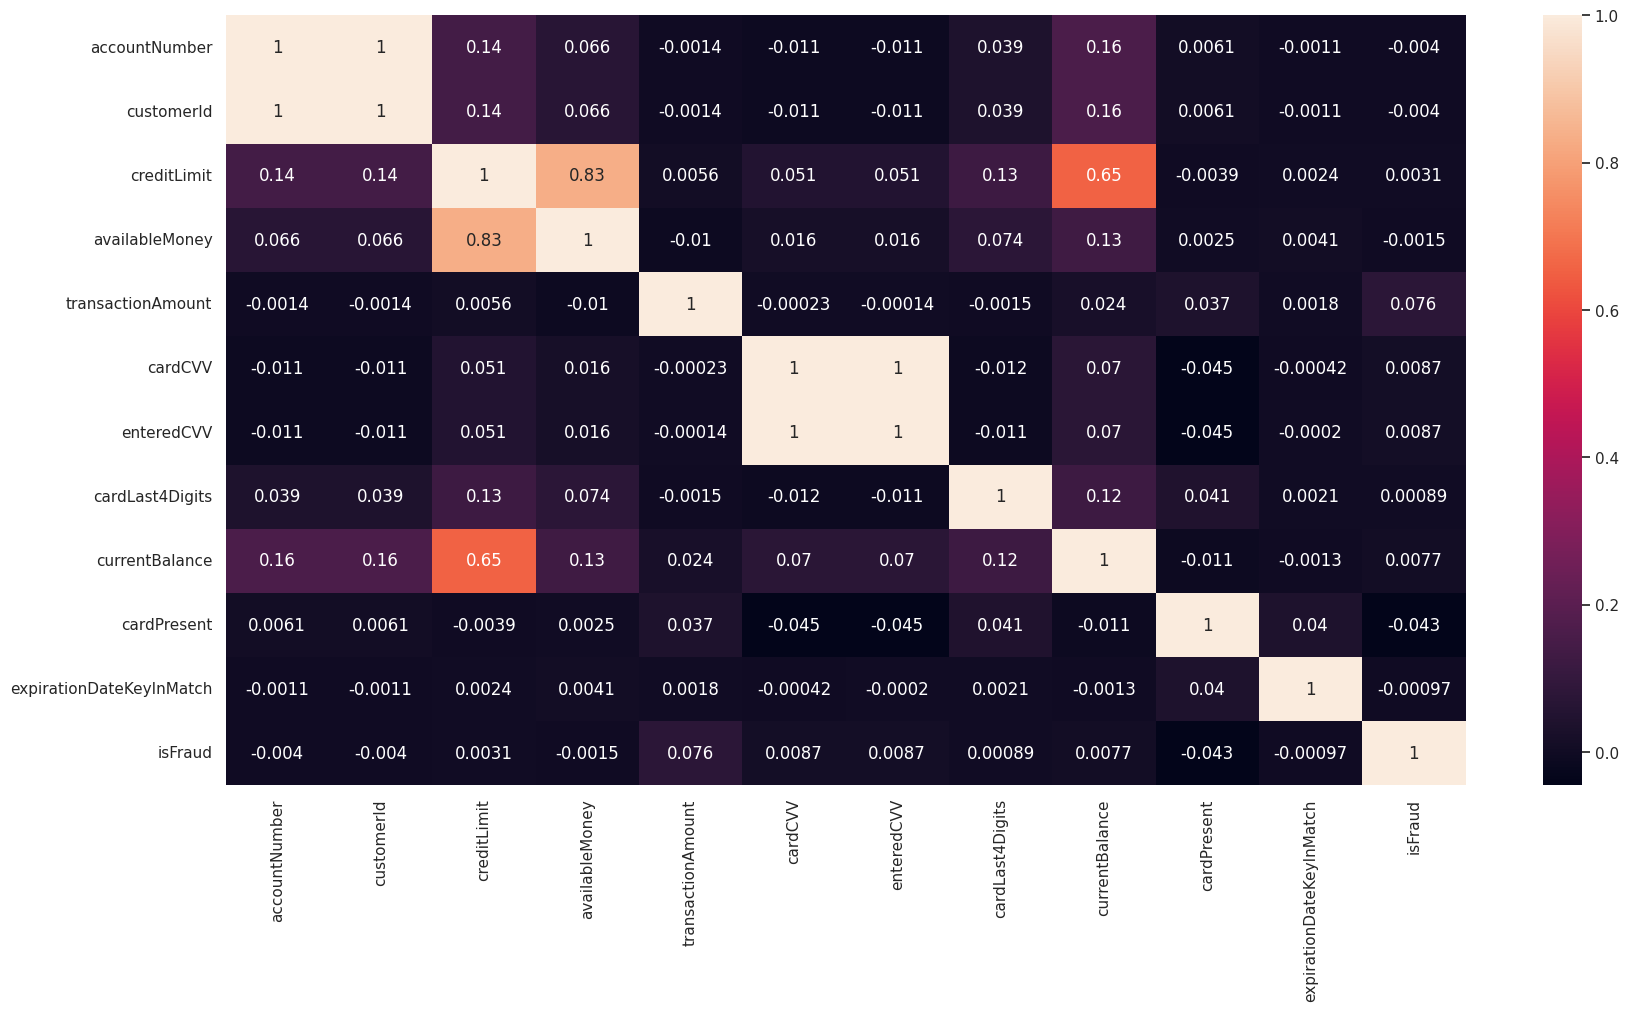

In [26]:
# Correlation matrix
matplotlib.rcParams['figure.figsize'] = (20.0, 10.0)
sns.heatmap(df1.corr(), annot=True)

In [27]:
# Correlation of features (with respect to dependent attribute 'isFraud')
corr_matrix = df1.corr()
corr_matrix['isFraud'].sort_values(ascending=False)

isFraud                     1.000000
transactionAmount           0.075651
enteredCVV                  0.008655
cardCVV                     0.008652
currentBalance              0.007715
creditLimit                 0.003108
cardLast4Digits             0.000886
expirationDateKeyInMatch   -0.000972
availableMoney             -0.001538
accountNumber              -0.004011
customerId                 -0.004011
cardPresent                -0.043418
Name: isFraud, dtype: float64

In [28]:
# Feature Selection

In [29]:
df2 = df1.copy()

# Handling missing values
df2['merchantCountryCode'] = df2['merchantCountryCode'].fillna('None')
df2['merchantName'] = df2['merchantName'].fillna('None')
df2['acqCountry'] = df2['acqCountry'].fillna('None')
df2['posEntryMode'] = df2['posEntryMode'].fillna('None')
df2['posConditionCode'] = df2['posConditionCode'].fillna('None')
df2['transactionType'] = df2['transactionType'].fillna('None')
df2['cardPresent'] = df2['cardPresent'].fillna('None')
df2['expirationDateKeyInMatch'] = df2['expirationDateKeyInMatch'].fillna('None')


# Label encoder
label_encoder = LabelEncoder()

df2['merchantCountryCode'] = label_encoder.fit_transform(df1['merchantCountryCode'])
df2['merchantName'] = label_encoder.fit_transform(df1['merchantName'])
df2['acqCountry'] = label_encoder.fit_transform(df1['acqCountry'])
df2['posEntryMode'] = label_encoder.fit_transform(df1['posEntryMode'])
df2['posConditionCode'] = label_encoder.fit_transform(df1['posConditionCode'])
df2['merchantCategoryCode'] = label_encoder.fit_transform(df1['merchantCategoryCode'])
df2['transactionType'] = label_encoder.fit_transform(df1['transactionType'])
df2['cardPresent'] = label_encoder.fit_transform(df1['cardPresent'])
df2['expirationDateKeyInMatch'] = label_encoder.fit_transform(df1['expirationDateKeyInMatch'])

df2.head()

,accountNumber,customerId,creditLimit,availableMoney,transactionDateTime,transactionAmount,merchantName,acqCountry,merchantCountryCode,posEntryMode,...,echoBuffer,currentBalance,merchantCity,merchantState,merchantZip,cardPresent,posOnPremises,recurringAuthInd,expirationDateKeyInMatch,isFraud
0,737265056,737265056,5000,5000.0,2016-08-13T14:27:32,98.55,2086,4,4,1,...,,0.0,,,,0,,,0,False
1,737265056,737265056,5000,5000.0,2016-10-11T05:05:54,74.51,27,4,4,3,...,,0.0,,,,1,,,0,False
2,737265056,737265056,5000,5000.0,2016-11-08T09:18:39,7.47,1305,4,4,3,...,,0.0,,,,0,,,0,False
3,737265056,737265056,5000,5000.0,2016-12-10T02:14:50,7.47,1305,4,4,3,...,,0.0,,,,0,,,0,False
4,830329091,830329091,5000,5000.0,2016-03-24T21:04:46,71.18,2084,4,4,1,...,,0.0,,,,1,,,0,False


In [30]:
X = df2[[
       'creditLimit', 'availableMoney',
       'transactionAmount', 'merchantName',
       'acqCountry', 'merchantCountryCode', 'posEntryMode', 'posConditionCode',
       'merchantCategoryCode', 'cardCVV', 'enteredCVV', 'cardLast4Digits', 
       'transactionType', 'currentBalance', 'cardPresent',
       'expirationDateKeyInMatch']]

y = df2['isFraud']

In [31]:
# Splitting train(80%) - test(20%) data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

##### Using Random Forest Model

##### Since the dataset is huge, it can be handled using Random Forest. Random Forest is based on the bagging algorithm and it builds many trees on subsets of the data and combines the output of all the trees. This reduces overfitting and also reduces variance and thus improves accuracy. Also it works well with both categorical and continuous variables and is robust to outliers and can handle them automatically.

In [32]:
# Running Random Forest Classification model
rf = RandomForestClassifier(random_state=42)
rf.fit(X_train, y_train)
print('Random Forest Accuracy (On Test Data): {:.3f}'.format(accuracy_score(y_test, rf.predict(X_test))*100))

Random Forest Accuracy (On Test Data): 98.567


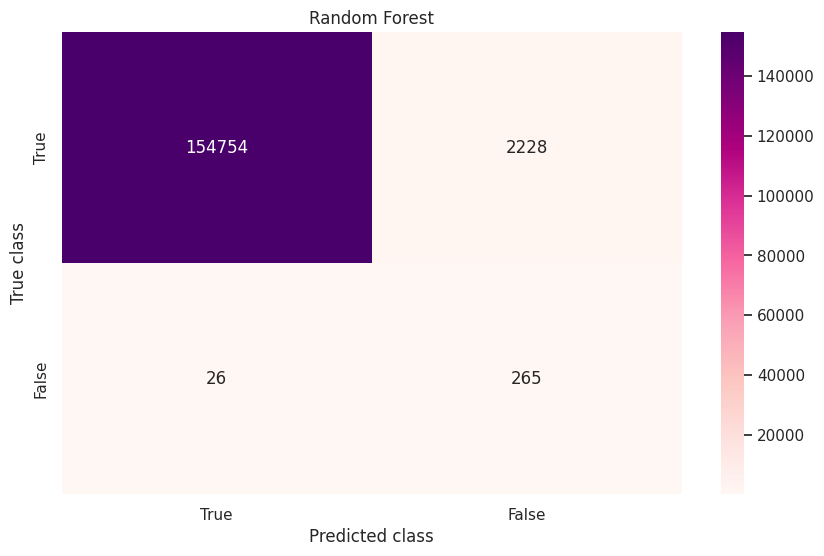

In [33]:
# Confusion matrix 
rf_y_pred = rf.predict(X_test)
matplotlib.rcParams['figure.figsize'] = (10, 6)
rf_cm = metrics.confusion_matrix(rf_y_pred, y_test)
sns.heatmap(rf_cm, cmap='RdPu', annot=True, fmt='.0f',xticklabels = ["True", "False"], yticklabels = ["True", "False"])
plt.ylabel('True class')
plt.xlabel('Predicted class')
plt.title('Random Forest')
plt.savefig('Random_Forest')

In [34]:
# Classification report
print("Correct predictions -", (rf_cm[0,0]+rf_cm[1,1]))
print("Incorrect predictions -", (rf_cm[0,1]+rf_cm[1,0]))
print("Total predictions -",(rf_cm.sum()))

print("\n", classification_report(y_test, rf.predict(X_test)))

Correct predictions - 155019
Incorrect predictions - 2254
Total predictions - 157273

               precision    recall  f1-score   support

       False       0.99      1.00      0.99    154780
        True       0.91      0.11      0.19      2493

    accuracy                           0.99    157273
   macro avg       0.95      0.55      0.59    157273
weighted avg       0.98      0.99      0.98    157273



In [35]:
# Feature importances
feature_labels = X.columns
importance = rf.feature_importances_
feature_indexes_by_importance = importance.argsort()[::-1]
for index in feature_indexes_by_importance:
    print('{}-{:.2f}%'.format(feature_labels[index], (importance[index] *100.0)))

transactionAmount-17.58%
currentBalance-16.46%
availableMoney-16.42%
merchantName-13.17%
cardLast4Digits-9.21%
enteredCVV-8.34%
cardCVV-8.21%
creditLimit-2.95%
posEntryMode-2.26%
merchantCategoryCode-2.02%
posConditionCode-1.72%
transactionType-0.54%
cardPresent-0.42%
merchantCountryCode-0.37%
acqCountry-0.30%
expirationDateKeyInMatch-0.02%


##### The recall is a measure of the model correctly identifying True Positives. Thus for all the actual fraud transactions, recall tells us how many we correctly identified as being a fraud transaction.

##### Recall = True Positives / (True Positives + False Negatives)

##### Since the Recall is very low, upsampling the minority class ('isFraud' = 'True') to improve recall.

In [36]:
# Taking top 10 features from Random Forest model  

X_data = df2[['transactionAmount', 'currentBalance', 'availableMoney', 
              'merchantName', 'cardLast4Digits', 'enteredCVV', 'cardCVV',
              'creditLimit', 'posEntryMode', 'merchantCategoryCode',
              'posConditionCode', 'transactionType']]
              
y_data = df2['isFraud']

In [37]:
df_minority = df2[df2['isFraud']==True]
df_majority = df2[df2['isFraud']==False]

# Upsampling the minority class
df_minority_upsampled = resample(df_minority, replace=True, n_samples=len(df_majority))

# Combining upsampled minority class with majority class
df_up_sampled = pd.concat([df_majority, df_minority_upsampled])

df_up_sampled_X = df_up_sampled[['transactionAmount', 'currentBalance', 'availableMoney', 
              'merchantName', 'cardLast4Digits', 'enteredCVV', 'cardCVV',
              'creditLimit', 'posEntryMode', 'merchantCategoryCode',
              'posConditionCode', 'transactionType']]
      
df_up_sampled_y = df_up_sampled['isFraud']
   
X_train, X_test, y_train, y_test = train_test_split(df_up_sampled_X, df_up_sampled_y, test_size=0.70, random_state=42)

rf = RandomForestClassifier(random_state=42)
rf.fit(X_train, y_train)
print('Random Forest Accuracy (On Test Data): {:.3f}'.format(accuracy_score(y_test, rf.predict(X_test))*100))

Random Forest Accuracy (On Test Data): 99.733


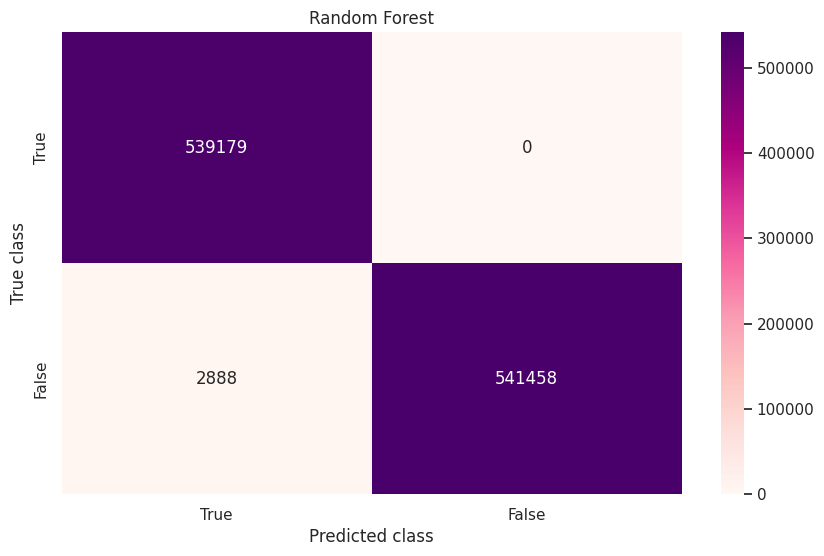

In [38]:
rf_y_pred = rf.predict(X_test)
matplotlib.rcParams['figure.figsize'] = (10, 6)
rf_cm = metrics.confusion_matrix(rf_y_pred, y_test)
sns.heatmap(rf_cm, cmap='RdPu', annot=True, fmt='.0f',xticklabels = ["True", "False"], yticklabels = ["True", "False"])
plt.ylabel('True class')
plt.xlabel('Predicted class')
plt.title('Random Forest')
plt.savefig('Random_Forest')

In [39]:
print("Correct predictions -", (rf_cm[0,0]+rf_cm[1,1]))
print("Incorrect predictions -", (rf_cm[0,1]+rf_cm[1,0]))
print("Total predictions -",(rf_cm.sum()))

print("\n", classification_report(y_test, rf.predict(X_test)))

Correct predictions - 1080637
Incorrect predictions - 2888
Total predictions - 1083525

               precision    recall  f1-score   support

       False       1.00      0.99      1.00    542067
        True       0.99      1.00      1.00    541458

    accuracy                           1.00   1083525
   macro avg       1.00      1.00      1.00   1083525
weighted avg       1.00      1.00      1.00   1083525



##### The accuracy is (99.7%) and recall is 100% on test data. So we can infer that the RandomForest model generalizes well. This leads to inferring that data overfitting might be less. 

#### Future Enhancements :

##### 1) Binning numerical fields - Binning the continuous features in the data can help improve the model performance on test data as it helps introduce non-linearity.

##### 2) Using Stratified k fold Cross Validation - The upsampling of the minority class can increase the likelihood of overfitting because it makes exact copies of the minority class samples. Cross validation reduces overfitting and 5-fold Stratified k-fold Cross-Validation can be used to train RandomForest model. It provides train and test index to split data in train-test data sets. The stratified k fold cross-validation if used for classification problems with class imblance maintains the same class ratio throughout the K folds same as the ratio in the original dataset. This ensures that the cross-validation output result is a close approximation of the generalization error in the data. At each k-fold cross-validation split, only the training set is oversampled which can be achieved using a machine learning pipeline and this prevents data or information leakage from train to test data. This ensures that the test data is not oversampled.

##### 3) Using Repeated Stratified k fold Cross Validation - This can improve model performance on unseen data and give a robust model.

##### 4) Hyper-parameter tuning for Random Forest and cross-validation - To enhance model efficiency.

##### 5) Deep diving into the causal of different interesting patterns of reversed and multiswipe transactions and deriving features based on causal-effect relationship between attributes in the data.

In [40]:
# # StratifiedKFold cross validation with upsampling minority class

# scoring = {'accuracy' : make_scorer(accuracy_score), 
#            'precision' : make_scorer(precision_score),
#            'recall' : make_scorer(recall_score), 
#            'f1_score' : make_scorer(f1_score)}

# # defining pipeline
# steps = [#('over', RandomOverSampler(sampling_strategy='minority')),
#          ('model', RandomForestClassifier(random_state=42))]
# pipeline = Pipeline(steps=steps)

# # evaluating pipeline
# cv = StratifiedKFold(n_splits=3)
# scores = cross_validate(pipeline, X_data, y_data, cv=cv, n_jobs=-1, scoring=scoring, verbose=3)
# scores

#### References

https://www.analyticsvidhya.com/blog/2020/07/10-techniques-to-deal-with-class-imbalance-in-machine-learning/
https://towardsdatascience.com/how-to-deal-with-imbalanced-data-in-python-f9b71aba53eb
https://matplotlib.org/stable/tutorials/introductory/pyplot.html
https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.plot.html
https://towardsdatascience.com/random-forest-in-python-24d0893d51c0
https://machinelearningmastery.com/random-forest-ensemble-in-python/
https://developers.google.com/machine-learning/crash-course/classification/precision-and-recall
https://machinelearningmastery.com/smote-oversampling-for-imbalanced-classification/